In [1]:
from process_similarity import *
import os
import os.path as osp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from utils import restore_agent, restore_agent_with_activation

/home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-

Instructions for updating:
non-resource variables are not supported in the long term


/home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/zhpeng/anaconda3/envs/ube

In [2]:
yaml_path = "yaml/ppo-300-agents.yaml"
test_mode = False

output_path = "data/similarity/{}.pkl".format(osp.basename(yaml_path).split(".yaml")[0])
# num_rollouts = 2 if test_mode else 100
num_rollouts = 20
num_agents = 20
local_mode = False

In [3]:
initialize_ray(num_gpus=0, test_mode=test_mode, local_mode=local_mode)

Sucessfully initialize Ray!
Available resources:  {'CPU': 32.0}


In [4]:
output_path = "data/similarity/ppo-300-agents_rollout20_seed0.pkl"
agent_dataset = build_agent_dataset(
    output_path=output_path
)

We have detected a saved agent dataset.
Load dataset from <data/similarity/ppo-300-agents_rollout20_seed0.pkl>


In [15]:
agent_dataset['PPO seed=164 rew=286.42']['obs']

array([[ 2.7464682e-03,  6.5453396e-06, -8.5347448e-04, ...,
         8.8593090e-01,  1.0000000e+00,  1.0000000e+00],
       [-1.4627114e-02, -4.1115455e-02, -1.7809056e-02, ...,
         9.1198212e-01,  1.0000000e+00,  1.0000000e+00],
       [-4.4061624e-02, -4.5561567e-02, -2.6702948e-02, ...,
         9.2670423e-01,  1.0000000e+00,  1.0000000e+00],
       ...,
       [-1.1044687e-01, -9.7800710e-04,  5.4449117e-01, ...,
         7.4522412e-01,  1.0000000e+00,  1.0000000e+00],
       [-1.1313531e-01, -5.4365038e-03,  5.2453214e-01, ...,
         7.4217832e-01,  1.0000000e+00,  1.0000000e+00],
       [-1.0994684e-01,  6.2528555e-03,  5.4487938e-01, ...,
         7.3692828e-01,  1.0000000e+00,  1.0000000e+00]], dtype=float32)

In [5]:
axs = []
for i in range(24):
    fig = plt.figure()
    ax = fig
    axs.append(ax)

TypeError: 'Figure' object is not iterable

<Figure size 432x288 with 0 Axes>

23 UP


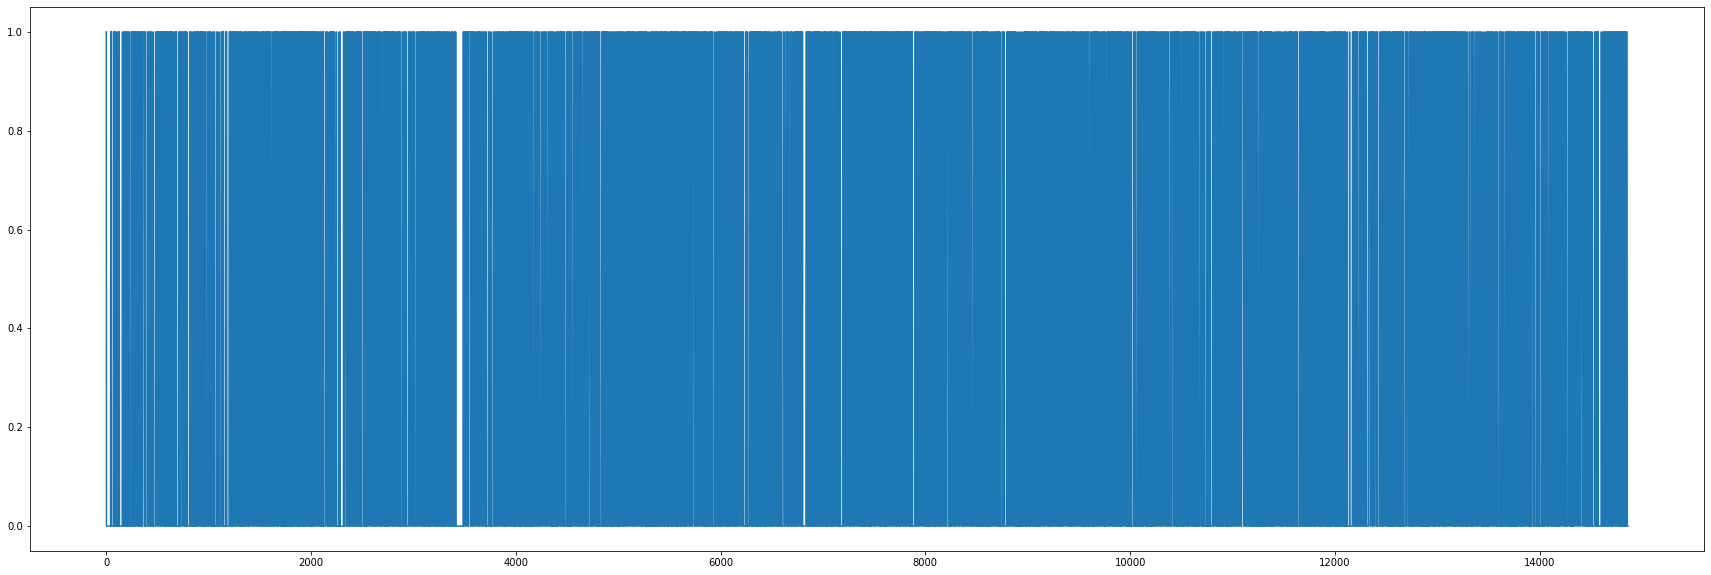

In [43]:

plt.figure(figsize=(30, 10))
plt.plot(agent_dataset['PPO seed=164 rew=286.42']['obs'][:, 8])

print(col, "UP")

In [44]:
def get_freq(y):
    n = len(y)  # length of the signal
    k = np.arange(n)
    Fs = 50
    T = n / Fs
    frq = k / T  # two sides frequency range
    frq1 = frq[range(int(n / 2))]  # one side frequency range
    return frq1

In [88]:
from scipy.fftpack import fft


def compute_fft(y):
    y = np.asarray(y)
    assert y.ndim == 1
    yy = fft(y)
    yf = np.abs(yy)
    yf1 = yf / len(y)
    yf2 = yf1[:int(len(y) / 2)]
    return yf2

def get_freq(y):
    n = len(y)  # length of the signal
    k = np.arange(n)
    Fs = 50
    T = n / Fs
    frq = k / T  # two sides frequency range
    frq1 = frq[range(int(n / 2))]  # one side frequency range
    return frq1

def get_max_f(i, s=None, e=None, source=None):
    
    y = source[s:e, i]
    fre = compute_fft(y)
    
    n = len(y)  # length of the signal
    k = np.arange(n)
    Fs = 50
    T = n / Fs
    frq = k / T  # two sides frequency range
    frq1 = frq[range(int(n / 2))]  # one side frequency range
    
    fre[0] = -10
    
    return frq1[fre.argmax()]

def get_av(age):
    candidates = [5, 7, 8, 10, 12, 13]
    s = age['obs']
    freq = [get_max_f(i, source=s) for i in candidates]

    candidates_a = [1, 2, 3]
    s_a = age['act']
    freq_a = [get_max_f(i, source=s_a) for i in candidates_a]

    freq += freq_a
    return freq

for aname, age in agent_dataset.items():
    d = get_av(age)
    print(d, "avg: ", np.mean(d) * 50, get_period(age['obs']))


[2.580059203444564, 2.580059203444564, 2.580059203444564, 2.6877018299246505, 2.529601722282024, 2.580059203444564, 2.580059203444564, 2.680974165769645, 2.4051399354144243] avg:  128.9095203922976 84.0
[2.7763675593349406, 2.7763675593349406, 2.6272369590049496, 2.446376443711131, 2.6272369590049496, 2.9604010661251428, 2.7763675593349406, 2.6875237974362225, 2.7763675593349406] avg:  135.85691923678976 84.0
[7.714334803275872, 3.430502262184296, 1.869881450088769, 3.078288757803104, 3.4734551285722466, 3.4734551285722466, 23.194547849493155, 3.078288757803104, 3.078288757803104] avg:  291.0613494199772 84.0
[2.642240620045799, 2.642240620045799, 2.653983911690447, 2.783160119781575, 2.653983911690447, 2.653983911690447, 2.642240620045799, 3.3850038165697844, 2.642240620045799] avg:  137.21710084225498 84.0
[2.756618381618382, 2.756618381618382, 2.8065684315684316, 2.756618381618382, 2.8065684315684316, 2.8065684315684316, 2.6317432567432566, 2.6692057942057943, 2.934565434565435] avg

In [111]:
def get_max_f(i, s=None, e=None, source=None):
    y = source[s:e, i]
    fre = compute_fft(y)
    x = get_freq(y)
    fre[0] = -10
    return x[fre.argmax()]

def get_av(age):
    candidates = [7, 12]
    s = age['obs']
    freq = [get_max_f(i, source=s) for i in candidates]
    return freq

# def peroid()
def get_freq(y):
    n = len(y)  # length of the signal
    k = np.arange(n)
    Fs = 50
    T = n / Fs
    frq = k / T  # two sides frequency range
    frq1 = frq[range(int(n / 2))]  # one side frequency range
    return frq1


def get_period(source, fps, indices=(7, 12)):
    ret = []
    for i in indices:
        y = source[:, i]
        fre = compute_fft(y)
        fre[0] = -np.inf
        period = fre.argmax() * (fps/len(y)) * fps
        ret.append(period)
    return np.mean(ret)

for aname, age in agent_dataset.items():
    d = get_av(age)
#     print(age['obs'][-1][0])
    print(d, "avg: ", np.mean(d) * 50, get_period(age['obs'], 50))


for i=7 result=129.0029601722282
for i=12 result=126.48008611410117
[2.580059203444564, 2.529601722282024] avg:  127.74152314316471 127.74152314316468
for i=7 result=138.81837796674702
for i=12 result=131.36184795024747
[2.7763675593349406, 2.6272369590049496] avg:  135.09011295849723 135.09011295849723
for i=7 result=171.5251131092148
for i=12 result=173.67275642861233
[3.430502262184296, 3.4734551285722466] avg:  172.59893476891358 172.59893476891358
for i=7 result=132.11203100228994
for i=12 result=132.69919558452236
[2.642240620045799, 2.653983911690447] avg:  132.40561329340613 132.40561329340613
for i=7 result=137.8309190809191
for i=12 result=140.32842157842157
[2.756618381618382, 2.8065684315684316] avg:  139.07967032967034 139.07967032967034
for i=7 result=134.76807354784788
for i=12 result=128.67391001532246
[2.6953614709569576, 2.5734782003064494] avg:  131.72099178158518 131.72099178158516
for i=7 result=81.02533883323512
for i=12 result=82.36460063213158
[1.620506776664702

2019-09-07 16:04:51,535	ERROR worker.py:1716 -- listen_error_messages_raylet: Connection closed by server.
2019-09-07 16:04:51,544	ERROR import_thread.py:89 -- ImportThread: Connection closed by server.


In [96]:
agent_dataset

{'PPO seed=164 rew=286.42': {'obs': array([[ 2.7464682e-03,  6.5453396e-06, -8.5347448e-04, ...,
           8.8593090e-01,  1.0000000e+00,  1.0000000e+00],
         [-1.4627114e-02, -4.1115455e-02, -1.7809056e-02, ...,
           9.1198212e-01,  1.0000000e+00,  1.0000000e+00],
         [-4.4061624e-02, -4.5561567e-02, -2.6702948e-02, ...,
           9.2670423e-01,  1.0000000e+00,  1.0000000e+00],
         ...,
         [-1.1044687e-01, -9.7800710e-04,  5.4449117e-01, ...,
           7.4522412e-01,  1.0000000e+00,  1.0000000e+00],
         [-1.1313531e-01, -5.4365038e-03,  5.2453214e-01, ...,
           7.4217832e-01,  1.0000000e+00,  1.0000000e+00],
         [-1.0994684e-01,  6.2528555e-03,  5.4487938e-01, ...,
           7.3692828e-01,  1.0000000e+00,  1.0000000e+00]], dtype=float32),
  'act': array([[ 0.49695918, -0.43714768,  0.74542177,  1.2657144 ],
         [ 1.3508301 , -0.61194384,  0.12362815,  0.41820902],
         [ 0.08680422, -1.4679301 ,  0.10734133, -1.0059886 ],
       

In [63]:
freq_a


[2.580059203444564, 2.680974165769645, 2.4051399354144243]

In [51]:
for i in range(24):
    y = agent_dataset['PPO seed=164 rew=286.42']['obs'][:, i]
    fre = compute_fft(y)
    fre[0] = -10
    x = get_freq(y)
    print(i, x[fre.argmax()])
# plt.plot(fre)

0 0.18837459634015072
1 2.660791173304629
2 0.05045748116254037
3 0.7400430570505921
4 2.580059203444564
5 2.580059203444564
6 2.580059203444564
7 2.580059203444564
8 2.580059203444564
9 0.05045748116254037
10 2.6877018299246505
11 0.15473627556512382
12 2.529601722282024
13 2.580059203444564
14 0.1581001076426265
15 0.1581001076426265
16 0.1581001076426265
17 0.1581001076426265
18 0.1581001076426265
19 0.1581001076426265
20 0.1581001076426265
21 0.1581001076426265
22 0.2388320775026911
23 0.04709364908503768


In [50]:
for i in range(24):
    y = agent_dataset['PPO seed=164 rew=286.42']['obs'][:5000, i]
    fre = compute_fft(y)
    x = get_freq(y)
    fre[0] = -10
    print(i, x[fre.argmax()])
# plt.plot(fre)

0 0.19
1 0.52
2 0.05
3 0.05
4 0.09
5 2.58
6 0.02
7 2.58
8 2.58
9 0.02
10 2.92
11 0.11
12 2.92
13 2.58
14 0.03
15 0.03
16 0.03
17 0.03
18 0.03
19 0.03
20 0.03
21 0.03
22 0.26
23 0.81


In [33]:
fre[1:].argmax()

51

23 UP


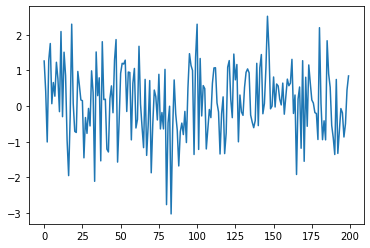

In [20]:

#     plt.figure()
plt.plot(agent_dataset['PPO seed=164 rew=286.42']['act'][:200, 3])
print(col, "UP")

In [48]:
agent_dataset = build_agent_dataset(
    yaml_path, num_rollouts,
    output_path=output_path,
    _num_agents=num_agents
)

[1/20] (+0.1s/0.1s) Start collect 20 rollouts from agent <PPO seed=164 rew=286.42>
[2/20] (+0.0s/0.1s) Start collect 20 rollouts from agent <PPO seed=1 rew=286.70>
[3/20] (+0.0s/0.1s) Start collect 20 rollouts from agent <PPO seed=146 rew=286.81>
[4/20] (+0.0s/0.2s) Start collect 20 rollouts from agent <PPO seed=153 rew=286.99>
[5/20] (+0.0s/0.2s) Start collect 20 rollouts from agent <PPO seed=5 rew=287.08>
[6/20] (+0.0s/0.2s) Start collect 20 rollouts from agent <PPO seed=26 rew=287.09>
[7/20] (+0.0s/0.2s) Start collect 20 rollouts from agent <PPO seed=135 rew=287.60>
[8/20] (+0.0s/0.2s) Start collect 20 rollouts from agent <PPO seed=274 rew=288.90>
[9/20] (+0.0s/0.2s) Start collect 20 rollouts from agent <PPO seed=188 rew=289.03>
[10/20] (+0.0s/0.2s) Start collect 20 rollouts from agent <PPO seed=255 rew=289.15>
[1/20] (+1.0s/1.0s) Collected 20 rollouts from agent <PPO seed=164 rew=286.42>
[2/20] (+0.6s/1.6s) Collected 20 rollouts from agent <PPO seed=1 rew=286.70>
[3/20] (+0.2s/1.8s

In [50]:
[ag['action_prob'].max() for anm, ag in agent_dataset.items()]

[8.178944,
 27.137465,
 8.896335,
 9.21393,
 28.52669,
 83.94205,
 22.211555,
 7.377322,
 7.8280954,
 21.503431,
 19.36519,
 63.920856,
 13.1116,
 37.080658,
 11.944738,
 21.04852,
 10.666102,
 18.289545,
 69.95945,
 62.569603]

In [4]:
data_dict = several_agent_rollout(
    yaml_path, num_rollouts, return_data=True,force_rewrite=True,
    _num_agents=num_agents
)

[1/20] (+0.1s/0.1s) Start collect 20 rollouts from agent <PPO seed=164 rew=286.42>
[2/20] (+0.0s/0.1s) Start collect 20 rollouts from agent <PPO seed=1 rew=286.70>
[3/20] (+0.0s/0.1s) Start collect 20 rollouts from agent <PPO seed=146 rew=286.81>
[4/20] (+0.0s/0.1s) Start collect 20 rollouts from agent <PPO seed=153 rew=286.99>
[5/20] (+0.0s/0.2s) Start collect 20 rollouts from agent <PPO seed=5 rew=287.08>
[6/20] (+0.0s/0.2s) Start collect 20 rollouts from agent <PPO seed=26 rew=287.09>
[7/20] (+0.0s/0.2s) Start collect 20 rollouts from agent <PPO seed=135 rew=287.60>
[8/20] (+0.0s/0.2s) Start collect 20 rollouts from agent <PPO seed=274 rew=288.90>
[9/20] (+0.0s/0.2s) Start collect 20 rollouts from agent <PPO seed=188 rew=289.03>
[10/20] (+0.0s/0.2s) Start collect 20 rollouts from agent <PPO seed=255 rew=289.15>
[1/20] (+27.4s/27.4s) Collected 20 rollouts from agent <PPO seed=164 rew=286.42>
[2/20] (+5.7s/33.2s) Collected 20 rollouts from agent <PPO seed=1 rew=286.70>
[3/20] (+0.4s/3

In [5]:
{agent_name: agent_data[0]['vf_preds']
 for agent_name, agent_data in data_dict.items()}

{'PPO seed=164 rew=286.42': array([ 18.42409  ,  18.875399 ,  18.55582  ,  19.214342 ,  20.182259 ,
         20.356647 ,  19.079082 ,  16.887598 ,  11.928535 ,  11.348067 ,
          9.462523 ,  10.78679  ,  10.125025 ,   8.75815  ,   8.52323  ,
          8.298042 ,   8.735185 ,   8.146431 ,   7.4379654,   6.8279886,
          6.8931055,   4.547289 ,   3.3066149,   3.0913918,   2.7876754,
          3.1873043,   3.609059 ,   4.043746 ,   1.7845874,  -9.205911 ,
        -12.842421 , -18.90477  , -23.64922  , -26.51008  , -26.610188 ,
        -31.42255  , -28.614164 , -35.618378 , -38.256287 , -43.415783 ,
        -45.300026 , -49.20301  , -49.552574 , -55.226112 , -58.333336 ,
        -65.56809  , -71.91171  , -76.778114 , -76.92616  , -79.93939  ,
        -80.22908  , -80.24667  , -77.168625 , -78.561935 ], dtype=float32),
 'PPO seed=1 rew=286.70': array([19.3039  , 19.593208, 19.913733, 20.114046, 20.854805, 21.119974,
        21.687803, 22.526999, 22.503914, 21.589571, 22.547735, 21.7

In [6]:
[ agent_data[0]['action_prob'].max()
 for agent_name, agent_data in data_dict.items()]

[1.0328515,
 9.321292,
 1.9972572,
 8.856409,
 5.941357,
 18.666958,
 18.710285,
 8.48519,
 6.7232723,
 10.286251,
 3.150369,
 7.015003,
 7.0904026,
 5.812541,
 7.3620076,
 5.706374,
 4.2189856,
 6.1369724,
 12.299002,
 23.39544]

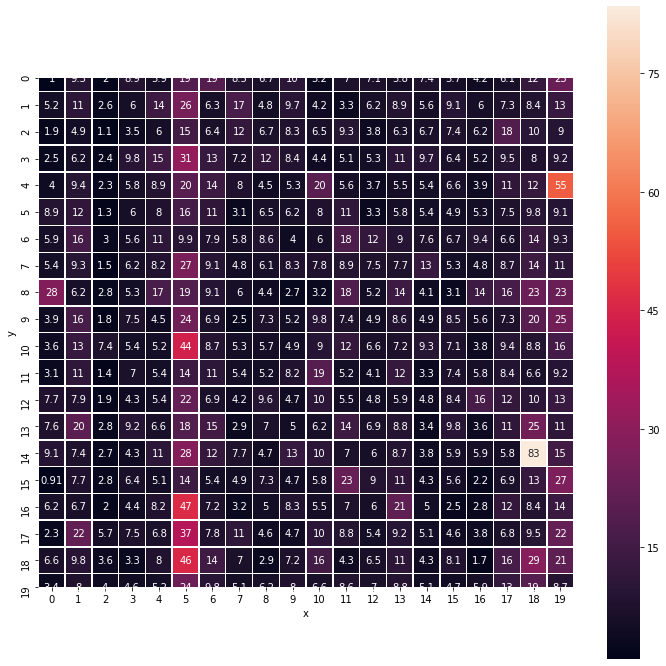

In [13]:
plot_df = []
for ia, (agent_name, agent_data) in enumerate(data_dict.items()):
    for ib, roll in enumerate(agent_data):
        val = roll['action_prob'].max()
        plot_df.append({'x': ia, 'y': ib, 'value': val})
plot_df = pd.DataFrame(plot_df)
draw(plot_df)

In [40]:
logit = [ad[0]['behaviour_logits'] for ad in data_dict.values()]
actions = [ad[0]['actions'] for ad in data_dict.values()]
probs = [ad[0]['action_prob'] for ad in data_dict.values()]

In [81]:
def do(log, x):
    mean, log_std = np.split(log, 2, 1)
    p1 = -0.5 * np.sum(np.square((x - mean) / np.exp(log_std)), axis=1)
    p2 = np.ones_like(p1) * (-0.5 * np.log(2.0 * np.pi) * x.shape[1])
    p3 = -np.sum(log_std, axis=1)
    logp = p1+p2+p3 

    sing_ret = None
    for m, ls, xcol in zip(mean.T, log_std.T, x.T):
        sing = -0.5*np.square((xcol - m)/(np.exp(ls))) - 0.5 * np.log(2*np.pi) - ls
        if sing_ret is None:
            sing_ret = np.exp(sing)
        else:
            sing_ret *= np.exp(sing)
    return logp, p1, p2, p3, sing_ret

In [92]:
for i in range(len(logit)):
    logp, p1, p2, p3, sing_sum = do(logit[i], actions[i])
#     break
    for enu, (fig, pr, x1,x2,x3, act, sing) in \
    enumerate(zip(np.exp(logp), probs[i], p1, p2, p3, actions[i], sing_sum)):
        if pr>8 or pr<0 or sing>8:
            print(fig, pr, logit[i][enu][:4], np.exp(logit[i][enu][4:]),"\n",
                  x1,x2,x3, act, "\nSING:", sing, )

9.321292 9.321292 [-0.18485726  1.1046407  -0.65904075 -0.27215168] [0.13057701 0.22210667 0.3297891  0.22817717] 
 -0.21926916 -3.675754 6.1273246 [-0.22589196  1.0728471  -0.5885156  -0.1528085 ] 
SING: 9.321293
8.856409 8.856409 [ 1.1593606  -0.75248826  0.05698964 -0.9275055 ] [0.11768468 0.24718876 0.31651443 0.21104133] 
 -0.3865416 -3.675754 6.2434373 [ 1.1155566  -0.7097562   0.19114171 -0.7899214 ] 
SING: 8.85641
18.666958 18.666958 [ 0.18119867 -0.7339623   0.3846312   0.8920207 ] [0.13383447 0.17513762 0.17782652 0.0721549 ] 
 -1.5067132 -3.675754 8.109222 [ 0.14837572 -0.7252559   0.23710813  1.0005554 ] 
SING: 18.666946
11.929552 11.929552 [ 0.03044756 -0.40796438  0.69151396 -0.3646938 ] [0.1170112  0.21556152 0.2923131  0.22104008] 
 -0.26456314 -3.675754 6.419336 [-0.00509914 -0.3266806   0.53349596 -0.37557957] 
SING: 11.929547
8.274616 8.274616 [ 1.6246134   0.16970564 -0.12653264  1.0925201 ] [0.25449032 0.13586825 0.14565837 0.206408  ] 
 -1.0800073 -3.675754 6.8689

In [87]:
sing_sum.max()

1.0328516

In [39]:
for fig, pr in zip(np.exp(logp), [0]):
    print(fig, pr)

0.9572678 0.9572678
0.13111955 0.13111955
0.07315823 0.07315823
0.056237005 0.056237005
0.0225302 0.022530211
0.012979294 0.012979294
1.0328515 1.0328515
0.08107276 0.08107276
0.8734025 0.8734025
0.17883247 0.17883247
0.25966048 0.25966048
0.10823124 0.10823124
0.020748297 0.020748297
0.045430675 0.045430675
0.0010175621 0.0010175621
0.10872398 0.10872398
0.06747836 0.06747836
0.00993907 0.009939069
0.02119139 0.02119139
0.013878309 0.013878309
0.009543773 0.009543773
0.02848622 0.02848622
0.0012822021 0.0012822021
0.011808623 0.011808623
0.0103400005 0.0103400005
0.002241957 0.002241957
0.0058015753 0.0058015753
0.0066258884 0.0066258884
0.00039678247 0.00039678247
0.18837024 0.18837024
0.009621345 0.009621345
0.002604153 0.002604153
0.00022492404 0.00022492404
0.0014258556 0.0014258556
0.009005876 0.009005876
0.0072230836 0.0072230836
0.025905054 0.025905054
0.0022224318 0.0022224318
0.0061260196 0.0061260196
0.025977045 0.025977045
0.0059010354 0.0059010354
4.785437e-06 4.785437e-06

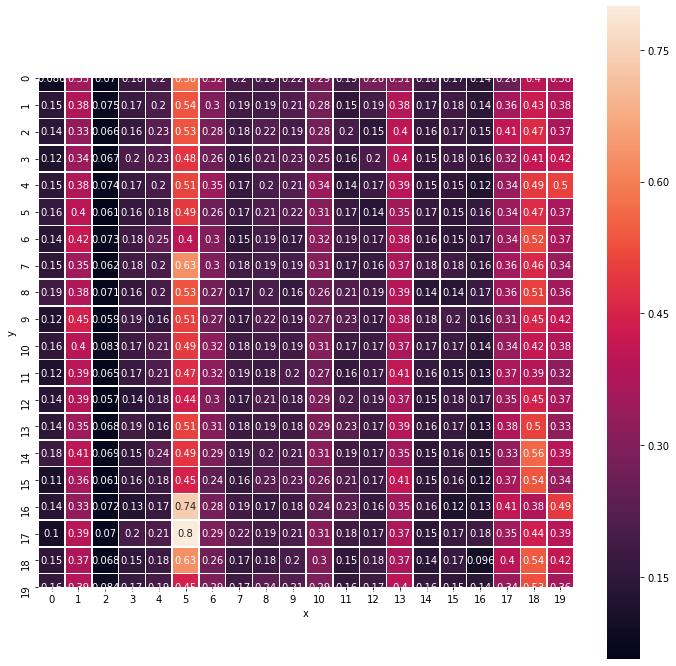

In [14]:
plot_df = []
for ia, (agent_name, agent_data) in enumerate(data_dict.items()):
    for ib, roll in enumerate(agent_data):
        val = roll['action_prob'].mean()
        plot_df.append({'x': ia, 'y': ib, 'value': val})
plot_df = pd.DataFrame(plot_df)
draw(plot_df)

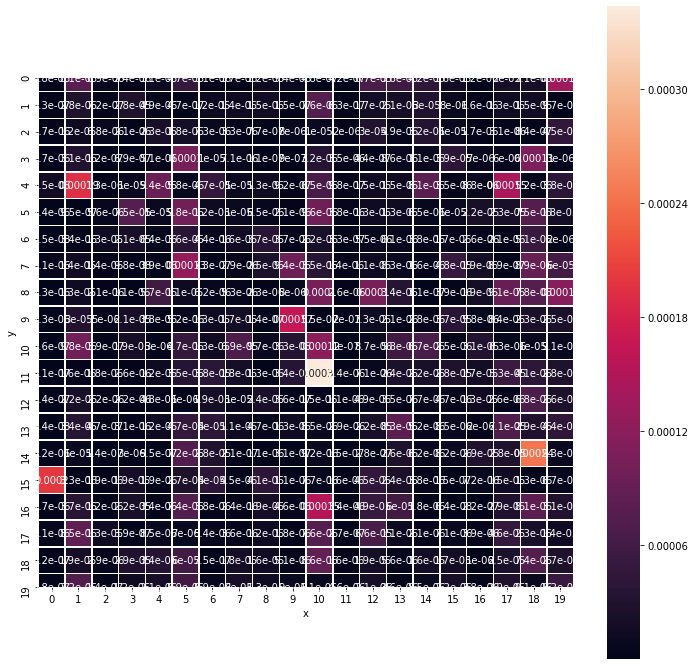

In [15]:
plot_df = []
for ia, (agent_name, agent_data) in enumerate(data_dict.items()):
    for ib, roll in enumerate(agent_data):
        val = roll['action_prob'].min()
        plot_df.append({'x': ia, 'y': ib, 'value': val})
plot_df = pd.DataFrame(plot_df)
draw(plot_df)

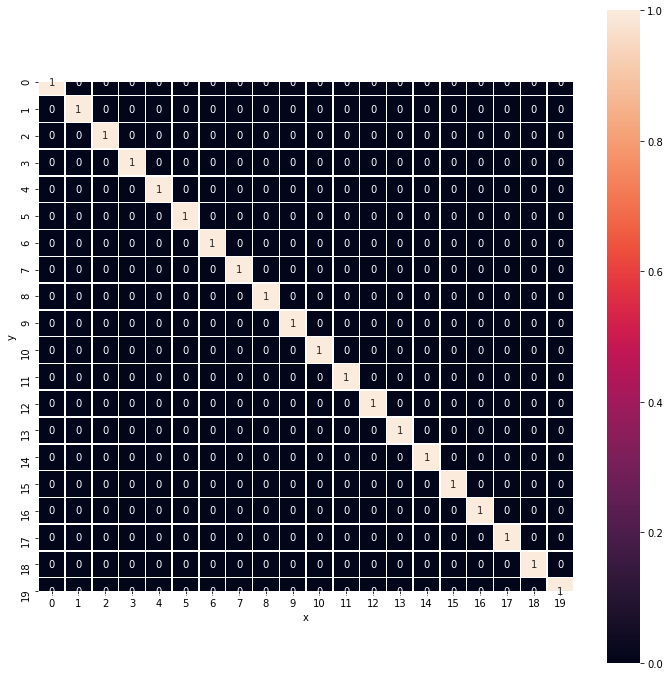

In [10]:
vplist = [ agent_data[0]['vf_preds'].mean()
 for agent_name, agent_data in data_dict.items()]

plot_df = []
for ia, a in enumerate(vplist):
    for ib, b in enumerate(vplist):
        plot_df.append({'x': ia, "y": ib, 'value': np.all(np.equal(a, b))})
plot_df = pd.DataFrame(plot_df)
draw(plot_df)

In [6]:
# ckpt = "/home/zhpeng/ray_results/0811-0to50and100to300/PPO_BipedalWalker-v2_188_seed=288_2019-08-12_11-50-56guywuhds/checkpoint_782/checkpoint-782"
# agent = restore_agent("PPO", ckpt, "BipedalWalker-v2", {
#     "batch_mode": "complete_episodes",
#     "sample_batch_size": 1
# })

# # 此乃原始ckpt附带的config。json文件
# org_con = {
#   "clip_param": 0.2,
#   "entropy_coeff": 0.001,
#   "env": "BipedalWalker-v2",
#   "lambda": 0.95,
#   "lr": 0.00025,
#   "num_cpus_for_driver": 0.2,
#   "num_envs_per_worker": 16,
#   "num_gpus": 0.15,
#   "num_sgd_iter": 10,
#   "num_workers": 1,
#   "seed": 288
# }
# for k in org_con:
#     print(org_con[k], agent.config[k])
    
    
# for _ in range(10):
#     sb = agent.workers.local_worker().sample()
#     print(sb['dones'].sum())
#     print(sb['rewards'].sum())
#     print(sb['actions'].min(0), sb['actions'].max(0))
#     print(sb['action_prob'].min(), sb['action_prob'].max())

In [7]:
# # ckpt = "/home/zhpeng/ray_results/0811-0to50and100to300/PPO_BipedalWalker-v2_188_seed=288_2019-08-12_11-50-56guywuhds/checkpoint_782/checkpoint-782"
# # agent = restore_agent("PPO", ckpt, "BipedalWalker-v2", {
# #     "batch_mode": "complete_episodes",
# #     "sample_batch_size": 1
# # })
# from utils import _get_ppo_agent
# agent = _get_ppo_agent("BipedalWalker-v2")

# # 此乃原始ckpt附带的config。json文件
# org_con = {
#   "clip_param": 0.2,
#   "entropy_coeff": 0.001,
#   "env": "BipedalWalker-v2",
#   "lambda": 0.95,
#   "lr": 0.00025,
#   "num_cpus_for_driver": 0.2,
#   "num_envs_per_worker": 16,
#   "num_gpus": 0.15,
#   "num_sgd_iter": 10,
#   "num_workers": 1,
#   "seed": 288
# }
# for k in org_con:
#     print(org_con[k], agent.config[k])
    
    
# for _ in range(10):
#     sb = agent.workers.local_worker().sample()
#     print(sb['dones'].sum())
#     print(sb['rewards'].sum())
#     print(sb['actions'].min(0), sb['actions'].max(0))
#     print(sb['action_prob'].min(), sb['action_prob'].max())

In [9]:
def agent_dataset_to_cka_result(agent_dataset, seed, yaml_path, layer, num_agents=None):
    sample_agent_dataset = sample_from_agent_dataset(agent_dataset, seed)
    obs_pool = build_obs_pool(sample_agent_dataset)
    ret = several_agent_replay(yaml_path, obs_pool, _num_agents=num_agents)
    # cka_result = np.zeros((len(alist), len(alist)))
    assert isinstance(layer, int)
    
    alist = [
        v['infos']['layer{}'.format(layer)] for v in ret.values()
    ]

    cka_list = []
    for ia, a in enumerate(alist):
        for ib, b in enumerate(alist):
            c = get_cka(a, b)
    #         cka_result[ia, ib] = c
            cka_list.append({
                "x": ia,
                "y": ib,
                "value": c
            })
    cka_result = pd.DataFrame(cka_list)
    cka_info = {
        "obs_pool": obs_pool,
        "replay_result": ret,
        "sample_agent_dataset": sample_agent_dataset
    }
    return cka_result, cka_info

def draw(cka_result, kl=False):
    plot_df = cka_result.pivot("y", "x", "reciprocal" if kl else "value")
    # Draw a heatmap with the numeric values in each cell
    f, ax = plt.subplots(figsize=(12, 12))
    sns.heatmap(plot_df, annot=True,  linewidths=.5,ax=ax, square=True)

In [38]:
import numpy as np

def cka_info_to_kl_divergence(cka_info):
    logit_list = \
        [agent_dict['infos']['behaviour_logits'] 
         for agent_dict in cka_info['replay_result'].values()]
    kl_list = []
    for ia, a in enumerate(logit_list):
        for ib, b in enumerate(logit_list):
            
            # compute the KL divergence
            source_mean, source_log_std = np.split(
                a, 2, axis=1
            )
            target_mean, target_log_std = np.split(
                b, 2, axis=1
            )
            
                # Copy from ray/rllib/models/tf/tf_action_dist.py but change to Numpy
            kl_divergence = np.sum(
                target_log_std - source_log_std +
                (np.square(source_log_std) + np.square(source_mean - target_mean))
                / (2.0 * np.square(target_log_std) + 1e-9) - 0.5,
                axis=1
            )  # An array with shape (num_samples,)
            print("KL for agent {} and {} has min {}, mean {}, max {}.".format(
                ia, ib, kl_divergence.min(), kl_divergence.mean(), kl_divergence.max()
            ))
            
            kl_divergence = np.clip(kl_divergence, None, 1e38)  # to avoid inf
            averaged_kl_divergence = np.clip(np.mean(kl_divergence), 0, 1e38)
            
            kl_list.append({
                "x": ia,
                "y": ib,
                "value": np.log(averaged_kl_divergence) if averaged_kl_divergence!=0 else 0,
                "reciprocal": 1/(averaged_kl_divergence) if averaged_kl_divergence!=0 else 0
            })
    kl_result = pd.DataFrame(kl_list)
    kl_info = {
        "act_prob_list": logit_list
    }
    return kl_result, kl_info



## This is impossible that the action probability is greater than 1!!!

In [10]:
# [agent['infos']['action_prob'].max() 
#  for agent in cka_info0['replay_result'].values()]

In [11]:
# [agent['infos']['action_prob'].min() 
#  for agent in cka_info0['replay_result'].values()]

# Try the seed 0 to generate CKA

In [12]:
cka_result0, cka_info0 = agent_dataset_to_cka_result(agent_dataset, 0, yaml_path, 1, num_agents)

[1/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=164 rew=286.42>
[2/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=1 rew=286.70>
[3/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=146 rew=286.81>
[4/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=153 rew=286.99>
[5/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=5 rew=287.08>
[6/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=26 rew=287.09>
[7/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=135 rew=287.60>
[8/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=274 rew=288.90>
[9/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=188 rew=289.03>
[10/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=255 rew=289.15>
[1/2

2019-09-05 16:56:20,081	ERROR worker.py:1714 -- This worker was asked to execute a function that it does not have registered. You may have to restart Ray.
2019-09-05 16:56:20,096	ERROR worker.py:1714 -- This worker was asked to execute a function that it does not have registered. You may have to restart Ray.
2019-09-05 16:56:20,108	ERROR worker.py:1714 -- This worker was asked to execute a function that it does not have registered. You may have to restart Ray.


[8/20] (+15.0s/24.3s) Collected output of (2000, 24) samples from agent <PPO seed=274 rew=288.90>
[9/20] (+0.0s/24.3s) Collected output of (2000, 24) samples from agent <PPO seed=188 rew=289.03>
[10/20] (+0.1s/24.4s) Collected output of (2000, 24) samples from agent <PPO seed=255 rew=289.15>
[11/20] (+24.3s/24.4s) Start collect output of (2000, 24) samples from agent <PPO seed=193 rew=289.17>
[12/20] (+0.0s/24.4s) Start collect output of (2000, 24) samples from agent <PPO seed=122 rew=289.20>
[13/20] (+0.0s/24.4s) Start collect output of (2000, 24) samples from agent <PPO seed=289 rew=289.88>
[14/20] (+0.0s/24.4s) Start collect output of (2000, 24) samples from agent <PPO seed=154 rew=290.68>
[15/20] (+0.0s/24.4s) Start collect output of (2000, 24) samples from agent <PPO seed=213 rew=291.07>
[16/20] (+0.0s/24.4s) Start collect output of (2000, 24) samples from agent <PPO seed=180 rew=291.69>
[17/20] (+0.0s/24.4s) Start collect output of (2000, 24) samples from agent <PPO seed=152 rew=

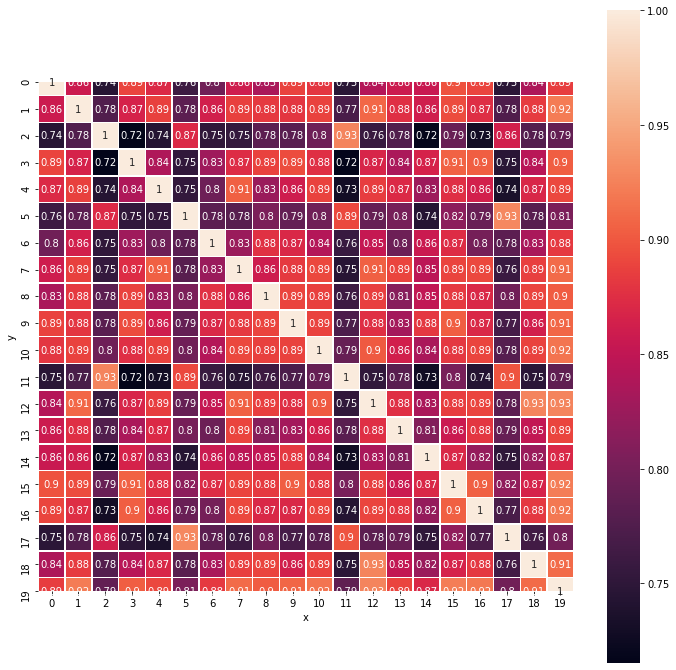

In [13]:
draw(cka_result0)

In [40]:
kl_result0, _ = cka_info_to_kl_divergence(cka_info0)

KL for agent 0 and 0 has min -0.0028790533542633057, mean -5.7531892707629595e-06, max 0.0.
KL for agent 0 and 1 has min -6.3744797706604, mean 12815.5458984375, max 10135523.0.
KL for agent 0 and 2 has min -0.9909948110580444, mean 47434.83984375, max 56307144.0.
KL for agent 0 and 3 has min -5.145777702331543, mean 421491.8125, max 754414976.0.
KL for agent 0 and 4 has min -7.624261856079102, mean 184895.46875, max 359609600.0.
KL for agent 0 and 5 has min -10.26141357421875, mean 7444.490234375, max 5174601.0.
KL for agent 0 and 6 has min -8.112137794494629, mean 39986.921875, max 61692620.0.
KL for agent 0 and 7 has min -7.429295063018799, mean 148916.140625, max 239512816.0.
KL for agent 0 and 8 has min -7.338467597961426, mean 11257.7978515625, max 17531420.0.
KL for agent 0 and 9 has min -7.975543022155762, mean 149747.84375, max 220125280.0.
KL for agent 0 and 10 has min -8.816530227661133, mean 2687.902099609375, max 4490671.5.
KL for agent 0 and 11 has min -6.756659507751465,

KL for agent 10 and 12 has min -7.088282108306885, mean 6739.23681640625, max 4923813.5.
KL for agent 10 and 13 has min -6.111242294311523, mean 7966.1669921875, max 4893675.5.
KL for agent 10 and 14 has min -5.7587385177612305, mean 41554.61328125, max 74216512.0.
KL for agent 10 and 15 has min -6.606816291809082, mean 710670.4375, max 1014039232.0.
KL for agent 10 and 16 has min -5.4689836502075195, mean 26814.6328125, max 22062644.0.
KL for agent 10 and 17 has min -6.169776439666748, mean 319540.875, max 305531328.0.
KL for agent 10 and 18 has min -6.895721435546875, mean 44818.8046875, max 73840344.0.
KL for agent 10 and 19 has min -8.195755004882812, mean 68936.03125, max 126143512.0.
KL for agent 11 and 0 has min -6.740444183349609, mean 39447.89453125, max 17469722.0.
KL for agent 11 and 1 has min -7.344700813293457, mean 41543.203125, max 37403856.0.
KL for agent 11 and 2 has min -3.84873628616333, mean 29152.65625, max 26637516.0.
KL for agent 11 and 3 has min -5.4026532173156

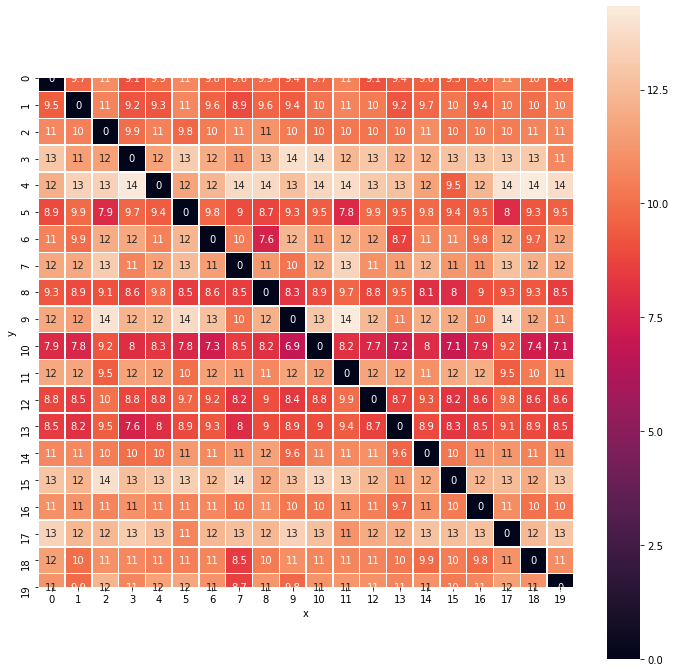

In [41]:
draw(kl_result0)

In [16]:
cka_result1, cka_info1 = agent_dataset_to_cka_result(agent_dataset, 1, yaml_path, 1, num_agents)

[1/20] (+0.1s/0.1s) Start collect output of (2000, 24) samples from agent <PPO seed=164 rew=286.42>
[2/20] (+0.0s/0.1s) Start collect output of (2000, 24) samples from agent <PPO seed=1 rew=286.70>
[3/20] (+0.0s/0.1s) Start collect output of (2000, 24) samples from agent <PPO seed=146 rew=286.81>
[4/20] (+0.0s/0.1s) Start collect output of (2000, 24) samples from agent <PPO seed=153 rew=286.99>
[5/20] (+0.0s/0.1s) Start collect output of (2000, 24) samples from agent <PPO seed=5 rew=287.08>
[6/20] (+0.0s/0.1s) Start collect output of (2000, 24) samples from agent <PPO seed=26 rew=287.09>
[7/20] (+0.0s/0.1s) Start collect output of (2000, 24) samples from agent <PPO seed=135 rew=287.60>
[8/20] (+0.0s/0.1s) Start collect output of (2000, 24) samples from agent <PPO seed=274 rew=288.90>
[9/20] (+0.0s/0.1s) Start collect output of (2000, 24) samples from agent <PPO seed=188 rew=289.03>
[10/20] (+0.0s/0.1s) Start collect output of (2000, 24) samples from agent <PPO seed=255 rew=289.15>
[1/2

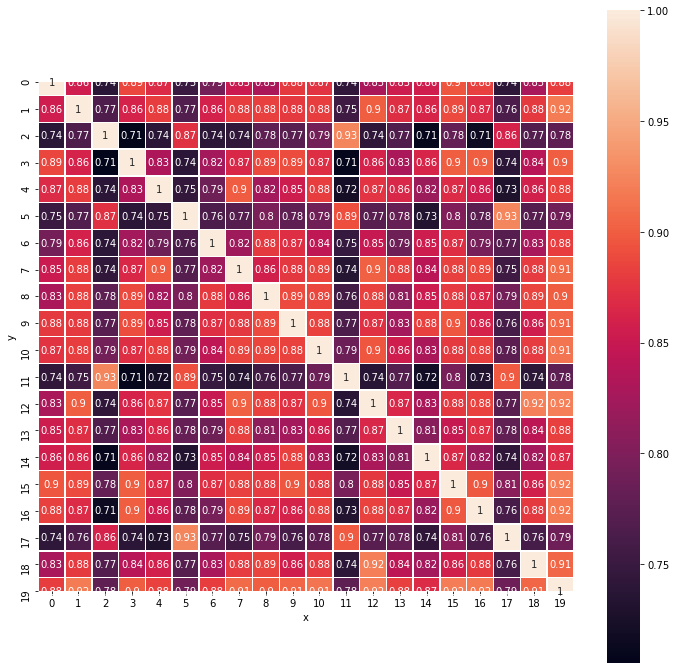

In [17]:
draw(cka_result1)

In [42]:
kl_result1, _ = cka_info_to_kl_divergence(cka_info1)

KL for agent 0 and 0 has min -0.46729302406311035, mean -0.0002480811963323504, max 0.0.
KL for agent 0 and 1 has min -6.444178104400635, mean 743317.9375, max 1382550528.0.
KL for agent 0 and 2 has min -5.302952766418457, mean 158133.390625, max 191055808.0.
KL for agent 0 and 3 has min -6.724527835845947, mean 9609.1494140625, max 2846034.75.
KL for agent 0 and 4 has min -7.844858169555664, mean 1824970.0, max 2904851712.0.
KL for agent 0 and 5 has min -9.288110733032227, mean 63479.9140625, max 104776888.0.
KL for agent 0 and 6 has min -8.068902969360352, mean 283679.125, max 455729888.0.
KL for agent 0 and 7 has min -6.385340690612793, mean 8917.7568359375, max 8349192.5.
KL for agent 0 and 8 has min -7.306797027587891, mean 10065.2421875, max 13535628.0.
KL for agent 0 and 9 has min -6.532133102416992, mean 23012.6875, max 25373550.0.
KL for agent 0 and 10 has min -9.566731452941895, mean 674694.9375, max 1346612992.0.
KL for agent 0 and 11 has min -6.879195690155029, mean 30950.8

KL for agent 11 and 11 has min -0.0007423162460327148, mean -2.265423518110765e-06, max 0.0.
KL for agent 11 and 12 has min -9.651077270507812, mean 23453.0390625, max 9030647.0.
KL for agent 11 and 13 has min -7.4370436668396, mean 268178.6875, max 352966720.0.
KL for agent 11 and 14 has min -7.499541282653809, mean 855354.75, max 1388696192.0.
KL for agent 11 and 15 has min -6.504880905151367, mean 19268.6484375, max 18370696.0.
KL for agent 11 and 16 has min -7.055492401123047, mean 255122.34375, max 383313824.0.
KL for agent 11 and 17 has min -7.600288391113281, mean 18590.994140625, max 21221978.0.
KL for agent 11 and 18 has min -8.418489456176758, mean 107235.875, max 181512128.0.
KL for agent 11 and 19 has min -8.648906707763672, mean 28486.68359375, max 25122604.0.
KL for agent 12 and 0 has min -5.544985771179199, mean 1361021.25, max 2380866048.0.
KL for agent 12 and 1 has min -6.134232521057129, mean 432819.65625, max 772920704.0.
KL for agent 12 and 2 has min -2.695086002349

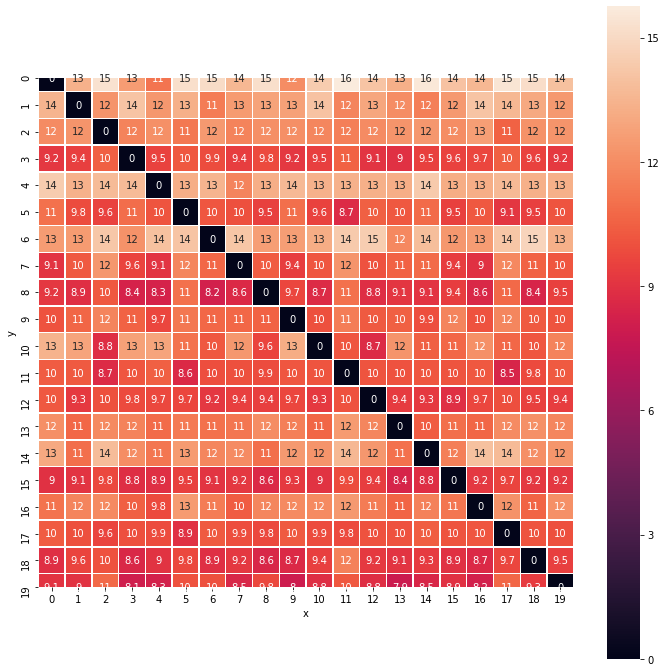

In [43]:
draw(kl_result1)

In [20]:
cka_result2, cka_info2 = agent_dataset_to_cka_result(agent_dataset, 2, yaml_path,1, num_agents)

[1/20] (+0.1s/0.1s) Start collect output of (2000, 24) samples from agent <PPO seed=164 rew=286.42>
[2/20] (+0.0s/0.1s) Start collect output of (2000, 24) samples from agent <PPO seed=1 rew=286.70>
[3/20] (+0.0s/0.1s) Start collect output of (2000, 24) samples from agent <PPO seed=146 rew=286.81>
[4/20] (+0.0s/0.1s) Start collect output of (2000, 24) samples from agent <PPO seed=153 rew=286.99>
[5/20] (+0.0s/0.1s) Start collect output of (2000, 24) samples from agent <PPO seed=5 rew=287.08>
[6/20] (+0.0s/0.1s) Start collect output of (2000, 24) samples from agent <PPO seed=26 rew=287.09>
[7/20] (+0.0s/0.1s) Start collect output of (2000, 24) samples from agent <PPO seed=135 rew=287.60>
[8/20] (+0.0s/0.1s) Start collect output of (2000, 24) samples from agent <PPO seed=274 rew=288.90>
[9/20] (+0.0s/0.1s) Start collect output of (2000, 24) samples from agent <PPO seed=188 rew=289.03>
[10/20] (+0.0s/0.1s) Start collect output of (2000, 24) samples from agent <PPO seed=255 rew=289.15>
[1/2

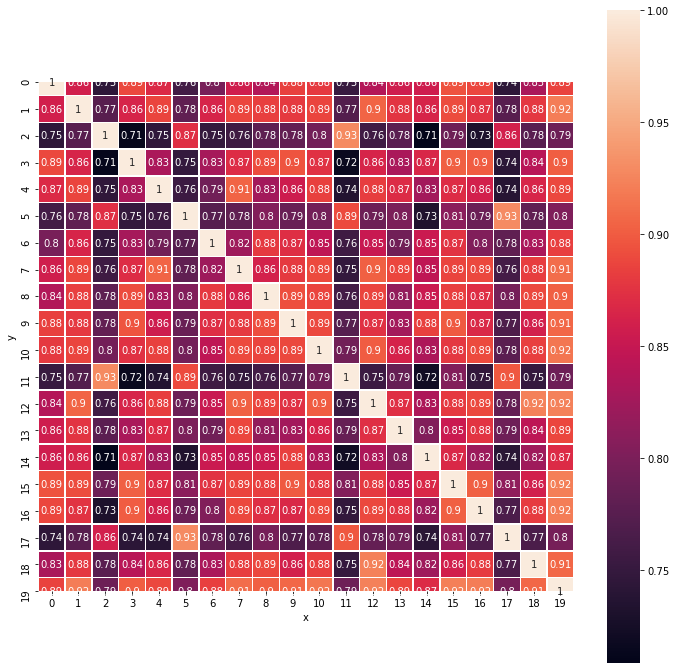

In [21]:
draw(cka_result2)

In [44]:
kl_result2, _ = cka_info_to_kl_divergence(cka_info2)

KL for agent 0 and 0 has min -0.08056196570396423, mean -7.816162542439997e-05, max 0.0.
KL for agent 0 and 1 has min -6.348200798034668, mean 39835.3203125, max 67647640.0.
KL for agent 0 and 2 has min -0.15371131896972656, mean 186574.59375, max 229144176.0.
KL for agent 0 and 3 has min -5.963297367095947, mean 55991.4140625, max 95853736.0.
KL for agent 0 and 4 has min -7.571879863739014, mean 14398.5615234375, max 10398879.0.
KL for agent 0 and 5 has min -10.814108848571777, mean 38202.82421875, max 26494700.0.
KL for agent 0 and 6 has min -7.550168991088867, mean 405263.5, max 489540224.0.
KL for agent 0 and 7 has min -6.097351551055908, mean 127858.421875, max 201074352.0.
KL for agent 0 and 8 has min -7.374407768249512, mean 28731.6015625, max 46037788.0.
KL for agent 0 and 9 has min -8.050280570983887, mean 4381.39111328125, max 2258133.75.
KL for agent 0 and 10 has min -8.532350540161133, mean 185778.59375, max 366899680.0.
KL for agent 0 and 11 has min -9.222768783569336, mea

KL for agent 11 and 10 has min -6.423219203948975, mean 1471376.875, max 2924265216.0.
KL for agent 11 and 11 has min -0.0765625536441803, mean -5.494469223776832e-05, max 0.0.
KL for agent 11 and 12 has min -8.944223403930664, mean 584929.875, max 936817152.0.
KL for agent 11 and 13 has min -8.866632461547852, mean 551068.75, max 952103552.0.
KL for agent 11 and 14 has min -7.954069137573242, mean 122985.7578125, max 187174832.0.
KL for agent 11 and 15 has min -9.655247688293457, mean 1272717.0, max 2431678976.0.
KL for agent 11 and 16 has min -4.439651966094971, mean 284430.40625, max 470867328.0.
KL for agent 11 and 17 has min -7.275856018066406, mean 418878.28125, max 742588736.0.
KL for agent 11 and 18 has min -8.189872741699219, mean 9989.9599609375, max 4491916.0.
KL for agent 11 and 19 has min -7.904947757720947, mean 22005.36328125, max 32660886.0.
KL for agent 12 and 0 has min -7.710727214813232, mean 271364.03125, max 300369856.0.
KL for agent 12 and 1 has min -6.65760564804

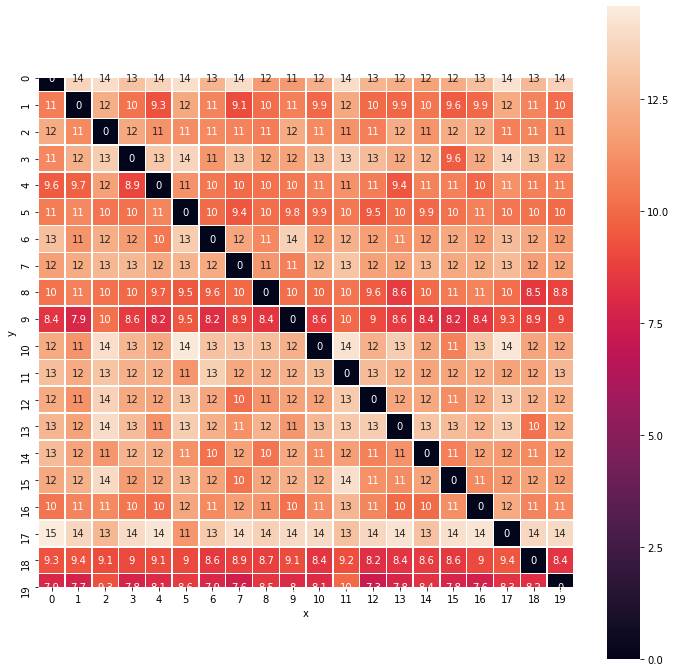

In [45]:
draw(kl_result2)

In [48]:
cka_result0_l0, _ = agent_dataset_to_cka_result(agent_dataset, 0, yaml_path, 0, num_agents)

[1/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=164 rew=286.42>
[2/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=1 rew=286.70>
[3/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=146 rew=286.81>
[4/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=153 rew=286.99>
[5/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=5 rew=287.08>
[6/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=26 rew=287.09>
[7/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=135 rew=287.60>
[8/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=274 rew=288.90>
[9/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=188 rew=289.03>
[10/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=255 rew=289.15>
[1/2

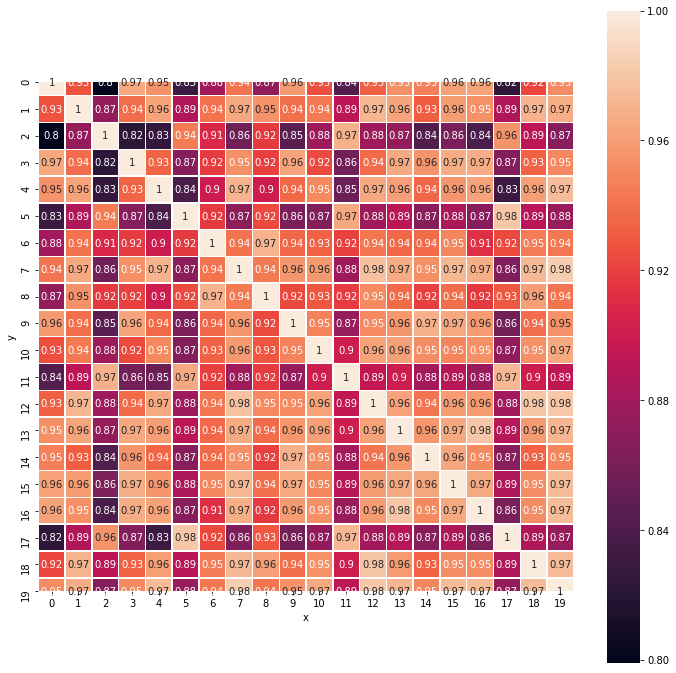

In [49]:
draw(cka_result0_l0)

In [50]:
cka_result1_l0, _ = agent_dataset_to_cka_result(agent_dataset, 1, yaml_path, 0, num_agents)

[1/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=164 rew=286.42>
[2/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=1 rew=286.70>
[3/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=146 rew=286.81>
[4/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=153 rew=286.99>
[5/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=5 rew=287.08>
[6/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=26 rew=287.09>
[7/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=135 rew=287.60>
[8/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=274 rew=288.90>
[9/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=188 rew=289.03>
[10/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=255 rew=289.15>
[1/2

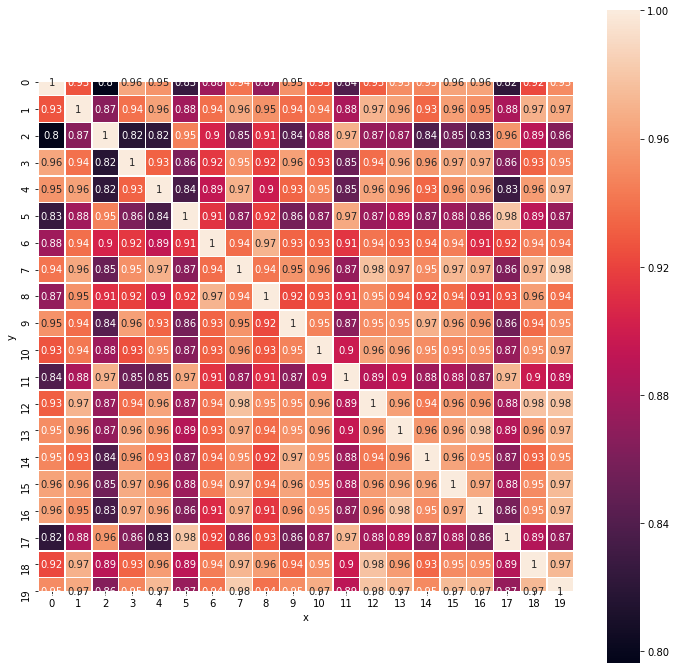

In [51]:
draw(cka_result1_l0)

In [52]:
cka_result2_l0, _ = agent_dataset_to_cka_result(agent_dataset, 2, yaml_path, 0, num_agents)

[1/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=164 rew=286.42>
[2/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=1 rew=286.70>
[3/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=146 rew=286.81>
[4/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=153 rew=286.99>
[5/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=5 rew=287.08>
[6/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=26 rew=287.09>
[7/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=135 rew=287.60>
[8/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=274 rew=288.90>
[9/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=188 rew=289.03>
[10/20] (+0.0s/0.0s) Start collect output of (2000, 24) samples from agent <PPO seed=255 rew=289.15>
[1/2

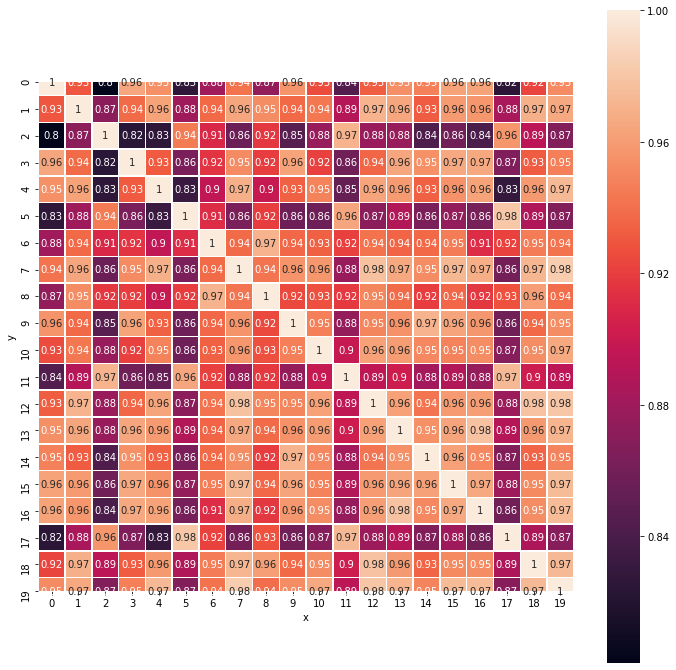

In [53]:
draw(cka_result2_l0)

In [139]:
import numpy as np
from utils import _get_ppo_agent
from utils import *
import ray
ray.init(ignore_reinit_error=True)

2019-09-05 18:28:02,105	ERROR worker.py:1379 -- Calling ray.init() again after it has already been called.


In [129]:
## How many sample are out of the range?

In [140]:
agent_dataset['PPO seed=164 rew=286.42']["act"]

array([[ 0.49695918, -0.43714768,  0.74542177,  1.2657144 ],
       [ 1.3508301 , -0.61194384,  0.12362815,  0.41820902],
       [ 0.08680422, -1.4679301 ,  0.10734133, -1.0059886 ],
       ...,
       [-6.4019713 , -5.670815  ,  5.575877  ,  2.3750365 ],
       [-0.6684745 , -1.1109481 ,  0.4540739 ,  1.4569255 ],
       [ 0.34778783,  0.95749724, -0.18957776, -0.1933746 ]],
      dtype=float32)

In [132]:
all_act = np.concatenate([a['act'] for a in agent_dataset.values()])
print(all_act.shape)
np.logical_or(all_act>1, all_act<-1).sum(0) / len(all_act)

(321408, 4)


array([0.24884882, 0.50012756, 0.36627589, 0.27507716])

In [134]:
def check_agent(a):
    act, _, info = a.get_policy().compute_actions(
        np.linspace(-1000000, 10000000, 10000)[:, None] * np.ones((10000, 24))
    )
    prob = info['action_prob']
    mask = np.logical_or(prob>1, prob<0)
    print(act[mask], prob[mask])
    print((prob>1).sum())
    print((prob<0).sum())
    print((act>1).sum())
    print((act<-1).sum())

In [136]:
a = _get_ppo_agent("BipedalWalker-v2")
check_agent(a)

ConnectionError: Error 111 connecting to 10.1.72.24:29026. Connection refused.

In [137]:
raw_a = _get_ppo_agent("BipedalWalker-v2")
ckpt = "/home/zhpeng/ray_results/0811-0to50and100to300/PPO_BipedalWalker-v2_188_seed=288_2019-08-12_11-50-56guywuhds/checkpoint_782/checkpoint-782"
raw_a.restore(ckpt)
check_agent(raw_a)

ConnectionError: Error 111 connecting to 10.1.72.24:29026. Connection refused.

In [94]:
my_a = restore_agent("PPO", ckpt, "BipedalWalker-v2")

In [126]:
check_agent(my_a)

[] []
0
0
16043
12645
